# Statistical Analysis of Data, Plus Data Cleaning

### Goals:

Use the pandas library to:

- Get summary info about a dataset and its variables
  - Apply and use `info`, `describe` and `dtype`
  - Use `mean`, `min`, `max`, and `value_counts` 
- Use `apply` and `applymap` to transform columns and create new values
- Explain `lambda` functions and use them to use an `apply` on a DataFrame
- Explain what a `groupby` object is and split a DataFrame using a `groupby`
- Reshape a DataFrame using `join`, `merge`, `pivot`, and `melt`
- Explore (and potentially, carefully, fill) null values using `is_na`/`is_null`
- Look for outliers and anomalies using `value_counts` and `describe`

## Data

Read about this dataset here: https://www.kaggle.com/ronitf/heart-disease-uci

![heart-data](heartbloodpres.jpeg)

The dataset is most often used to practice classification algorithms. Can one develop a model to predict the likelihood of heart disease based on other measurable characteristics? We will return to that specific question in a few weeks, but for now we wish to use the dataset to practice some pandas methods.

### 1. Get summary info about a dataset 

Applying and using `info`, `describe`, `mean`, `min`, `max`, `apply`, and `applymap` from the Pandas library

The Pandas library has several useful tools built in. Let's explore some of them.

In [1]:
!pwd
!ls

/Users/lberlin/Documents/111819/data_cleaning_and_statistical_analysis-HTX_DS_111819
README.md                           heartbloodpres.jpeg
ds_chars.csv                        manipulating_data_with_pandas.ipynb
heart.csv                           states.csv


In [2]:
import pandas as pd
uci_df = pd.read_csv('heart.csv')

In [3]:
uci_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Attributes

In [4]:
uci_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Check the .shape method on our dataset. What do you observe?
uci_df.shape

(303, 14)

#### Methods

In [6]:
# Call the .info() method on our dataset. What do you observe?
uci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Use the code below. How does the output differ from info() ?
uci_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
# Call the .describe() method on our dataset. What do you observe?
uci_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Using `describe` gives you a quick overview of each column's spread - by looking at the minimum value, maximum value, mean and standard deviation for each column, what kinds of trends or tendencies can you imagine that we could glean from this?

The methods `.mean()`, `.min()`, `.max()`, and `.sum()` will perform just the way you think they will!

Note that these are methods both for Series and for DataFrames.

In [9]:
uci_df.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [12]:
#Let's check the rest of those methods 
uci_df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

For a DataFrame _Series_, the `.value_counts()` method will tell you how many of each value you've got.

In [16]:
uci_df['age'].value_counts(ascending=True)[:10]

29    1
74    1
76    1
77    1
37    2
34    2
38    3
69    3
71    3
40    3
Name: age, dtype: int64

Checking the `value_counts` for a column can be a really useful way to find anomalous data, because you can see if you're getting 

Let's [check the documentation for `value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) - what other arguments could we pass through that method that might be useful if we're looking for outliers or anomalies?

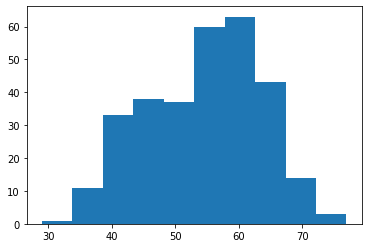

In [15]:
import matplotlib.pyplot as plt

plt.hist(uci_df.age)
plt.show()

In [ ]:
# Pass other arguments through here

#### What are the different values for `restecg`?

In [19]:
# Your code here!
uci_df["restecg"].value_counts()[:10]

1    152
0    147
2      4
Name: restecg, dtype: int64

#### Null values

When checking the documentation, you may have noticed that `value_counts` by default won't check for nulls. To look for null values, typically shown in Pandas as `NaN` or not-a-number, you can use `.isna()` in a few different ways. We already saw one - `.info()` typically shows null values (although it won't do it by default if your dataframe is too big).

In [20]:
# Here is another way to check an entire dataframe for nulls
uci_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Will null values always show up as `NaN`s? Let's discuss.

### 2.  Changing data

#### DataFrame.applymap() and Series.map()

The ```.applymap()``` method takes a function as input that it will then apply to every entry in the dataframe.

In [24]:
# Originally looks like:
uci_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Defining a function to test this...
def add_one(x):
    return x + 1

In [25]:
# Look!
uci_df.applymap(add_one).head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,64,2,4,146,234,2,1,151,1,3.3,1,1,2,2
1,38,2,3,131,251,1,2,188,1,4.5,1,1,3,2
2,42,1,2,131,205,1,1,173,1,2.4,3,1,3,2
3,57,2,2,121,237,1,2,179,1,1.8,3,1,3,2
4,58,1,1,121,355,1,2,164,2,1.6,3,1,3,2


The `.map()` method takes a function as input that it will then apply to every entry in the Series.

In [26]:
# Can you see how this is different from applymap?
uci_df['age'].map(add_one).tail()

298    58
299    46
300    69
301    58
302    58
Name: age, dtype: int64

#### Anonymous Functions (Lambda Abstraction)

Simple functions can be defined right in the function call. This is called 'lambda abstraction'; the function thus defined has no name and hence is "anonymous".

In [27]:
# Originally looks like:
uci_df['oldpeak'][:10]

0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
5    0.4
6    1.3
7    0.0
8    0.5
9    1.6
Name: oldpeak, dtype: float64

In [28]:
# I like to read this as 'for each x in this series, df[column], round x'
uci_df['oldpeak'].map(lambda x: round(x))[:10]

0    2
1    4
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    2
Name: oldpeak, dtype: int64

#### Use an anonymous function to turn the entries in `age` to strings:

In [28]:
# Your code here!
uci_df['age'][:10]

0    63
1    37
2    41
3    56
4    57
5    57
6    56
7    44
8    52
9    57
Name: age, dtype: int64

In [30]:
uci_df['age'].map(lambda x: str(x))

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: object

### Further Practice - Animal Shelter Data on Animal Outcomes

Let's take a moment to examine the [Austin Animal Center outcomes data set](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238/data). What kinds of questions can we ask this data and what kinds of information can we get back?

In pairs and as a class, let's generate ideas.

Before doing anything else let's use `.info()`, `.describe()`, `dtypes`, etc. - what observations can we make about the data?

In [63]:
# First, need to grab that data again
animal_df = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [64]:
animal_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby


In [34]:
# How does using describe on this df differ from using it on the uci df?
animal_df.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,111563,76400,111563,111563,111563,111557,50787,111563,111559,111538,111563,111563
unique,99949,18178,91739,91739,6652,9,22,5,5,50,2501,579
top,A721033,Max,04/18/2016 12:00:00 AM,04/18/2016 12:00:00 AM,09/01/2015,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,33,496,39,39,118,48694,27987,63123,39059,20138,30457,11684


In [37]:
animal_df["Breed"].value_counts()

Domestic Shorthair Mix                   30457
Pit Bull Mix                              8130
Labrador Retriever Mix                    6413
Chihuahua Shorthair Mix                   6061
Domestic Shorthair                        3925
                                         ...  
English Bulldog/Australian Cattle Dog        1
Cardigan Welsh Corgi/Rat Terrier             1
Pheasant Mix                                 1
English Coonhound/Border Collie              1
Pbgv/Pit Bull                                1
Name: Breed, Length: 2501, dtype: int64

In [42]:
all(animal_df["DateTime"] == animal_df["MonthYear"])

True

Let's rename the columns to something a bit more code-friendly.

In [35]:
# Originally:
animal_df.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed', 'Color'],
      dtype='object')

In [65]:
# Change the column names here - hint, use a list!
col_names = ["ID", "name", "date", "datev2", "DoB", "outcome", "outcome_sub",
             "animal_type", "gender_outcome", "age_outcome", "breed", "color"]

In [66]:
animal_df.columns = col_names

In [67]:
animal_df.columns

Index(['ID', 'name', 'date', 'datev2', 'DoB', 'outcome', 'outcome_sub',
       'animal_type', 'gender_outcome', 'age_outcome', 'breed', 'color'],
      dtype='object')

What are the breed `value_counts`?

How about outcome counts for dogs?

_Hint_ <br>
Remember we did filtering in a previous lesson like this:<br>
`customer_df.loc[customer_df["state"]=='OR']`

In [36]:
# Your code here - check for breed value counts


In [37]:
# Your code here - check outcomes based on animal type to get dog outcomes


### Datetime Objects

We want to get the average age of animals, but the age variable is a mess.

Use a `map` to help change the dates from strings to datetime objects. 

- First use `map` to grab only the first 10 characters of date
- Second,  we can use `to_datetime` to convert the remaining characters to a datetime object

[For further reading on datetime formats, go here](http://strftime.org/)

In [68]:
# How do we know that the original DateTime column isn't the right type?
animal_df.dtypes

ID                object
name              object
date              object
datev2            object
DoB               object
outcome           object
outcome_sub       object
animal_type       object
gender_outcome    object
age_outcome       object
breed             object
color             object
dtype: object

In [70]:
# Can you parse out exactly what this code is doing, and why?
animal_df['date'] = pd.to_datetime(
    animal_df['date'].map(lambda x: x[:10]), format='%m/%d/%Y')

In [71]:
animal_df.head()

,ID,name,date,datev2,DoB,outcome,outcome_sub,animal_type,gender_outcome,age_outcome,breed,color
0,A789027,Lennie,2019-02-17,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,2016-02-13,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,2014-03-18,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,2014-10-18,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,2014-08-05,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby


In [74]:
# Can you parse out exactly what this code is doing, and why?
animal_df['datev2'] = pd.to_datetime(animal_df['datev2'])

In [75]:
animal_df['DoB'] = pd.to_datetime(animal_df['DoB'], format='%m/%d/%Y')

In [76]:
animal_df.dtypes

ID                        object
name                      object
date              datetime64[ns]
datev2            datetime64[ns]
DoB               datetime64[ns]
outcome                   object
outcome_sub               object
animal_type               object
gender_outcome            object
age_outcome               object
breed                     object
color                     object
dtype: object

In [77]:
animal_df.head()

,ID,name,date,datev2,DoB,outcome,outcome_sub,animal_type,gender_outcome,age_outcome,breed,color
0,A789027,Lennie,2019-02-17,2019-02-17 11:44:00,2017-02-13,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,2016-02-13,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,2014-03-18,2014-03-18 11:47:00,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,2014-10-18,2014-10-18 18:52:00,2014-08-01,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,2014-08-05,2014-08-05 16:59:00,2014-06-03,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby


Let's do the same to the 'date of birth' column:

In [43]:
# Your code here


In [44]:
animal_df.dtypes

Animal ID                   object
Name                        object
DateTime            datetime64[ns]
MonthYear                   object
Date of Birth               object
Outcome Type                object
Outcome Subtype             object
Animal Type                 object
Sex upon Outcome            object
Age upon Outcome            object
Breed                       object
Color                       object
dtype: object

Now, create a new variable `age_in_days` by subtracting `dob` from `date`:

In [78]:
# Your code here
animal_df["age_in_days"] = animal_df["date"] - animal_df["DoB"]

In [79]:
animal_df["age_in_days"]

0         734 days
1         128 days
2           6 days
3          78 days
4          63 days
            ...   
111570    366 days
111571   1461 days
111572     77 days
111573   2027 days
111574    247 days
Name: age_in_days, Length: 111575, dtype: timedelta64[ns]

In [80]:
animal_df.head()

,ID,name,date,datev2,DoB,outcome,outcome_sub,animal_type,gender_outcome,age_outcome,breed,color,age_in_days
0,A789027,Lennie,2019-02-17,2019-02-17 11:44:00,2017-02-13,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,734 days
1,A720371,Moose,2016-02-13,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,128 days
2,A674754,NaN,2014-03-18,2014-03-18 11:47:00,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6 days
3,A689724,*Donatello,2014-10-18,2014-10-18 18:52:00,2014-08-01,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,78 days
4,A680969,*Zeus,2014-08-05,2014-08-05 16:59:00,2014-06-03,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,63 days


Use `map` again to convert `age_in_days` to `years_old` with the `lambda` function `x.days/365`

In [86]:
# Code code code
animal_df["years_old"] = animal_df['age_in_days'].map(lambda x: x.days / 365)

In [87]:
# Time for a sanity check:
animal_df.head()

,ID,name,date,datev2,DoB,outcome,outcome_sub,animal_type,gender_outcome,age_outcome,breed,color,age_in_days,years_old
0,A789027,Lennie,2019-02-17,2019-02-17 11:44:00,2017-02-13,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,734 days,2.010959
1,A720371,Moose,2016-02-13,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,128 days,0.350685
2,A674754,NaN,2014-03-18,2014-03-18 11:47:00,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6 days,0.016438
3,A689724,*Donatello,2014-10-18,2014-10-18 18:52:00,2014-08-01,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,78 days,0.213699
4,A680969,*Zeus,2014-08-05,2014-08-05 16:59:00,2014-06-03,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,63 days,0.172603


## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [88]:
# What object type does this return?
uci_df.groupby('sex')

#### `.groups` and `.get_group()`

In [89]:
uci_df.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [90]:
uci_df.groupby('sex').get_group(0).tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Aggregating

In [97]:
uci_df.groupby('sex').median()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,57,1,131,253,0,1,157,0,0.6,1,0,2,1
1,54,0,130,235,0,1,151,0,0.8,1,0,2,0


**Exercise:** Find the average cholesterol level for those with heart disease.

In [105]:
# Your code here!

uci_df.groupby('target')['chol'].mean()
# uci_df.groupby('target').get_group(0)['chol'].mean()
# uci_df.groupby('target').get_group(1)['chol'].mean()

target
0    251.086957
1    242.230303
Name: chol, dtype: float64

### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [110]:
animal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111575 entries, 0 to 111574
Data columns (total 14 columns):
ID                111575 non-null object
name              76409 non-null object
date              111575 non-null datetime64[ns]
datev2            111575 non-null datetime64[ns]
DoB               111575 non-null datetime64[ns]
outcome           111569 non-null object
outcome_sub       50796 non-null object
animal_type       111575 non-null object
gender_outcome    111571 non-null object
age_outcome       111550 non-null object
breed             111575 non-null object
color             111575 non-null object
age_in_days       111575 non-null timedelta64[ns]
years_old         111575 non-null float64
dtypes: datetime64[ns](3), float64(1), object(9), timedelta64[ns](1)
memory usage: 11.9+ MB


In [111]:
animal_df.groupby?

In [114]:
# Your code here
animal_df.groupby(["animal_type", "gender_outcome"]).mean()

years_old
animal_type gender_outcome           
Bird        Intact Female    2.251206
            Intact Male      1.536152
            Unknown          1.152293
Cat         Intact Female    0.900230
            Intact Male      0.617718
            Neutered Male    1.950848
            Spayed Female    1.993554
            Unknown          0.512051
Dog         Intact Female    2.287251
            Intact Male      2.477279
            Neutered Male    2.966802
            Spayed Female    2.861237
            Unknown          1.020025
Livestock   Intact Female    1.308806
            Intact Male      1.729863
            Neutered Male    1.030137
            Unknown          0.393836
Other       Intact Female    1.583188
            Intact Male      1.442494
            Neutered Male    1.614220
            Spayed Female    1.586710
            Unknown          1.233029

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [116]:
# Your code here
animal_df["year"] = animal_df['date'].map(lambda x: x.year)

In [118]:
animal_df["month"] = animal_df['date'].map(lambda x: x.month)

In [119]:
animal_df.head()

,ID,name,date,datev2,DoB,outcome,outcome_sub,animal_type,gender_outcome,age_outcome,breed,color,age_in_days,years_old,year,month
0,A789027,Lennie,2019-02-17,2019-02-17 11:44:00,2017-02-13,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream,734 days,2.010959,2019,2
1,A720371,Moose,2016-02-13,2016-02-13 17:59:00,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,128 days,0.350685,2016,2
2,A674754,NaN,2014-03-18,2014-03-18 11:47:00,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,6 days,0.016438,2014,3
3,A689724,*Donatello,2014-10-18,2014-10-18 18:52:00,2014-08-01,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black,78 days,0.213699,2014,10
4,A680969,*Zeus,2014-08-05,2014-08-05 16:59:00,2014-06-03,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby,63 days,0.172603,2014,8


In [120]:
adopted_df = animal_df.loc[animal_df["outcome"] == "Adoption"]

In [121]:
adopted_df.groupby("month").size()

month
1     3696
2     3169
3     3191
4     2805
5     3787
6     4758
7     5321
8     5020
9     4139
10    4622
11    4004
12    4182
dtype: int64

## 4. Reshaping a DataFrame

### `.pivot()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [124]:
uci_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
uci_df.pivot(values = 'chol', columns = 'age')

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,193.0,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

Really quick, let's use some tiny toy dataframes to show these techniques.

### `.join()`

In [128]:
# Creating toy dataframes - what should these look like on their own?
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [129]:
toy1

,age,HP
0,63,142
1,33,47


In [130]:
toy2

,age,HP
0,63,100
1,33,200


In [133]:
# What arguments are we passing into this function and why?
toy1.join(toy2.set_index('age'), on = 'age',
          lsuffix = '_A', rsuffix = '_B').head()

,age,HP_A,HP_B
0,63,142,100
1,33,47,200


### `.merge()`

In [134]:
people_df = pd.read_csv('ds_chars.csv', index_col = 0)
people_df.head()

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [135]:
states_df = pd.read_csv('states.csv', index_col = 0)
states_df.head()

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [136]:
# Let's break this down too, what arguments are we passing?
merged_df = people_df.merge(states_df, left_on='home_state', right_on='state',
                            how='inner')

In [137]:
merged_df

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


### `pd.concat()`

**Exercise:** Look up the documentation on [pd.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.

Your result should still have only five rows!

In [141]:
#Your code here
# variable = [states_df, people_df]
pd.concat([states_df, people_df], axis=1)

,state,nickname,capital,name,HP,home_state
0,WA,evergreen,Olympia,greg,200,WA
1,TX,alamo,Austin,miles,200,WA
2,DC,district,Washington,alan,170,TX
3,OH,buckeye,Columbus,alison,300,DC
4,OR,beaver,Salem,rachel,200,TX


### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [142]:
pd.melt(merged_df, id_vars='HP')

,HP,variable,value
0,200,name,greg
1,200,name,miles
2,170,name,alan
3,200,name,rachel
4,300,name,alison
5,200,home_state,WA
6,200,home_state,WA
7,170,home_state,TX
8,200,home_state,TX
9,300,home_state,DC


## Keep it going! 

Up until now, we've only been working with the outcomes data on our Austin animals. Now, let's join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

You can download the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

_Hints_ :

- import and clean the intake dataset first
    - drop everything but the intake date and the animal id
    - use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days_in_shelter variable
- create a new month_at_intake variable
- notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. Use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here